# Protein dataset

This dataset has been obtained from the protein data bank (https://www.rcsb.org/) where you can search for and collate data on a selection or all structures within the database. The first dataset contains selected information from all structures within the database (as of 1st july 2023) and primarily summarises the data quality and some basic information about each structure. More data can be added. Gaining insight into this can allow us to gain an idea of how data has changed.

Setting up the basic analysis environment

In [1]:
#import variuos models we might need
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import json
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import os

# Read in the first dataset.

In [2]:
# Read the CSV file into a DataFrame
file_path = './datacollection_keep_data.csv'  # Replace with the actual path to your CSV file
data_df = pd.read_csv(file_path)

In [3]:
# What types of data do we have
data_df.dtypes

Entry ID                                                 object
Experimental Method                                      object
Resolution (Å)                                           object
PubMed ID                                               float64
Release Date                                             object
Number of Non-Hydrogen Atoms per Deposited Model        float64
Total Number of Polymer Instances (Chains)              float64
Total Number of Polymer Residues per Deposited Model    float64
Number of Water Molecules per Deposited Model           float64
Disulfide Bond Count per Deposited Model                float64
Number of Distinct Molecular Entities                   float64
Molecular Weight per Deposited Model                    float64
Number of Distinct Non-polymer Entities                 float64
Entry Polymer Composition                                object
Number of Distinct DNA Entities                         float64
Number of Distinct NA Hybrid Entities   

# What do these things mean?
See supplementary Glossary of terms found in the proteins data set file.

In [4]:
data_df.head()

,Entry ID,Experimental Method,Resolution (Å),PubMed ID,Release Date,Number of Non-Hydrogen Atoms per Deposited Model,Total Number of Polymer Instances (Chains),Total Number of Polymer Residues per Deposited Model,Number of Water Molecules per Deposited Model,Disulfide Bond Count per Deposited Model,Number of Distinct Molecular Entities,Molecular Weight per Deposited Model,Number of Distinct Non-polymer Entities,Entry Polymer Composition,Number of Distinct DNA Entities,Number of Distinct NA Hybrid Entities,Number of Distinct Protein Entities,Number of Distinct RNA Entities,Entry Polymer Types,Journal Name (Abbrev),R Free,R Work,Release Year
0,100D,X-RAY DIFFRACTION,1.9,7816639.0,1995-03-31,489.0,2.0,20.0,67.0,NaN,3.0,6.36,1.0,NA-hybrid,NaN,1.0,NaN,NaN,Nucleic acid (only),Nucleic Acids Res,NaN,0.145,1995.0
1,101D,X-RAY DIFFRACTION,2.25,7711020.0,1995-02-27,556.0,2.0,24.0,36.0,NaN,4.0,7.94,2.0,DNA,1.0,NaN,NaN,NaN,Nucleic acid (only),Biochemistry,0.252,NaN,1995.0
2,101M,X-RAY DIFFRACTION,2.07,NaN,1998-04-08,1413.0,1.0,154.0,138.0,NaN,5.0,18.11,3.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Thesis,0.202,0.157,1998.0
3,102D,X-RAY DIFFRACTION,2.2,7608897.0,1995-02-07,582.0,2.0,24.0,73.0,NaN,3.0,7.64,1.0,DNA,1.0,NaN,NaN,NaN,Nucleic acid (only),J Med Chem,NaN,0.155,1995.0
4,102L,X-RAY DIFFRACTION,1.74,8429913.0,1993-10-31,1439.0,1.0,165.0,132.0,NaN,4.0,18.93,2.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Nature,NaN,NaN,1993.0


In [5]:
data_df

,Entry ID,Experimental Method,Resolution (Å),PubMed ID,Release Date,Number of Non-Hydrogen Atoms per Deposited Model,Total Number of Polymer Instances (Chains),Total Number of Polymer Residues per Deposited Model,Number of Water Molecules per Deposited Model,Disulfide Bond Count per Deposited Model,Number of Distinct Molecular Entities,Molecular Weight per Deposited Model,Number of Distinct Non-polymer Entities,Entry Polymer Composition,Number of Distinct DNA Entities,Number of Distinct NA Hybrid Entities,Number of Distinct Protein Entities,Number of Distinct RNA Entities,Entry Polymer Types,Journal Name (Abbrev),R Free,R Work,Release Year
0,100D,X-RAY DIFFRACTION,1.9,7816639.0,1995-03-31,489.0,2.0,20.0,67.0,NaN,3.0,6.36,1.0,NA-hybrid,NaN,1.0,NaN,NaN,Nucleic acid (only),Nucleic Acids Res,NaN,0.145,1995.0
1,101D,X-RAY DIFFRACTION,2.25,7711020.0,1995-02-27,556.0,2.0,24.0,36.0,NaN,4.0,7.94,2.0,DNA,1.0,NaN,NaN,NaN,Nucleic acid (only),Biochemistry,0.252,NaN,1995.0
2,101M,X-RAY DIFFRACTION,2.07,NaN,1998-04-08,1413.0,1.0,154.0,138.0,NaN,5.0,18.11,3.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Thesis,0.202,0.157,1998.0
3,102D,X-RAY DIFFRACTION,2.2,7608897.0,1995-02-07,582.0,2.0,24.0,73.0,NaN,3.0,7.64,1.0,DNA,1.0,NaN,NaN,NaN,Nucleic acid (only),J Med Chem,NaN,0.155,1995.0
4,102L,X-RAY DIFFRACTION,1.74,8429913.0,1993-10-31,1439.0,1.0,165.0,132.0,NaN,4.0,18.93,2.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Nature,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208826,9RSA,X-RAY DIFFRACTION,1.8,2340284.0,1991-04-15,2106.0,2.0,248.0,181.0,8.0,3.0,27.99,1.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Biochemistry,NaN,NaN,1991.0
208827,9RUB,X-RAY DIFFRACTION,2.6,1905726.0,1993-01-15,7044.0,2.0,932.0,NaN,NaN,4.0,101.84,3.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),J Biol Chem,NaN,NaN,1993.0
208828,9WGA,X-RAY DIFFRACTION,1.8,2231724.0,1990-10-15,2544.0,2.0,342.0,231.0,32.0,2.0,34.27,NaN,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),J Mol Biol,NaN,NaN,1990.0
208829,9XIA,X-RAY DIFFRACTION,1.9,2734296.0,1991-10-15,3360.0,1.0,388.0,299.0,NaN,4.0,43.54,2.0,homomeric protein,NaN,NaN,1.0,NaN,Protein (only),Proc Natl Acad Sci U S A,NaN,NaN,1991.0


So there is 208831 individual structures and 23 columns of information for each.
A simple starting point might be to see how things have changed with time.

How has releases to the pdb changed with time?

Try to plot the total Entry IDs by year.

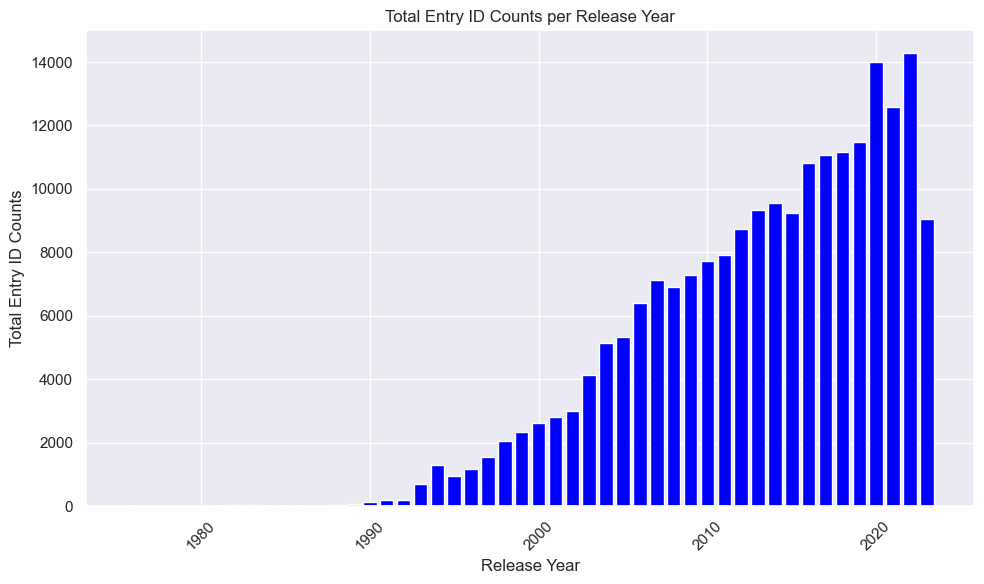

In [6]:
yearly_counts = data_df.groupby("Release Year")["Entry ID"].count()

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Total Entry ID Counts")
plt.title("Total Entry ID Counts per Release Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion - there has been a year on year increase of pdb releases. The value is less for the current year as it is not finished

Perhaps the plot could be made to look nicer.

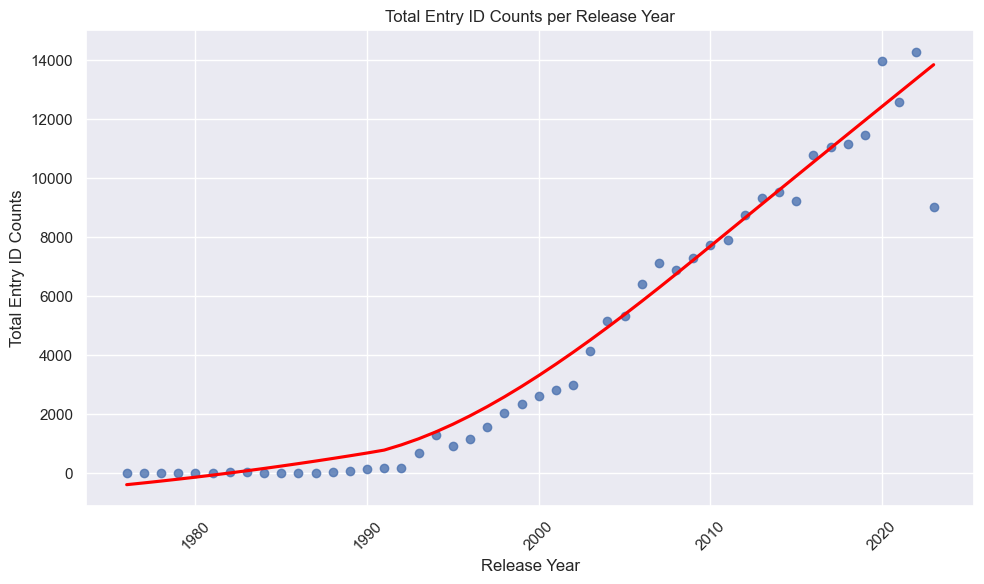

In [7]:
# Creating the histogram with a smooth trendline using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=yearly_counts.index, y=yearly_counts.values, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Release Year")
plt.ylabel("Total Entry ID Counts")
plt.title("Total Entry ID Counts per Release Year")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Can this be broken down in more detail?
Lets have a look at the number of released structures per year per experimental method.


In [8]:
#What are the counts for each experimental method?
data_df["Experimental Method"].value_counts()

X-RAY DIFFRACTION                                            177588
ELECTRON MICROSCOPY                                           16426
SOLUTION NMR                                                  13913
ELECTRON CRYSTALLOGRAPHY                                        230
SOLID-STATE NMR                                                 150
X-RAY DIFFRACTION, NEUTRON DIFFRACTION                          113
NEUTRON DIFFRACTION                                              76
FIBER DIFFRACTION                                                38
SOLUTION NMR, SOLUTION SCATTERING                                33
SOLUTION SCATTERING                                              32
NEUTRON DIFFRACTION, X-RAY DIFFRACTION                           27
POWDER DIFFRACTION                                               21
X-RAY DIFFRACTION, SOLUTION SCATTERING                            7
X-RAY DIFFRACTION, EPR                                            7
SOLUTION NMR, THEORETICAL MODEL                 

X-ray diffractionis by far the most. 
How many structures from each experimental method are released each year.

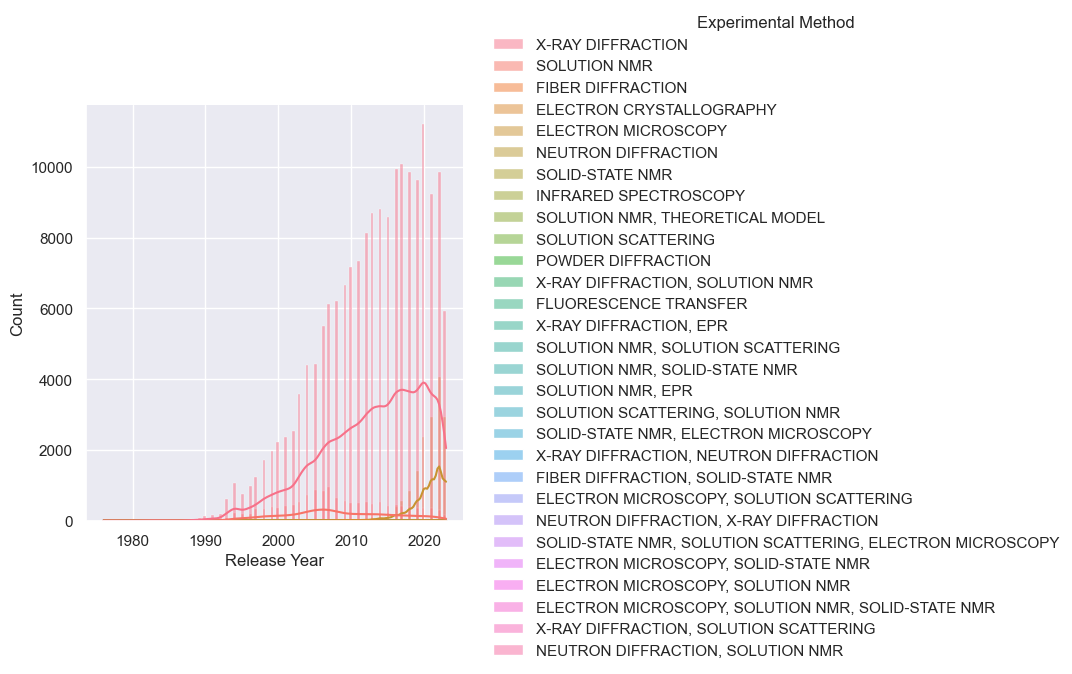

In [9]:
# try a single plot
# Create a single histogram with different colors for each experimental method
sns.displot(data=data_df, x="Release Year", hue="Experimental Method", kde=True)


Does appear to show changes in Experimental method over time. Can it be made clearer
Lets try a different way of grouping and plotting

In [10]:
#Use groupby to create a new dataframe containing each method per year and counts for it.
method_counts = data_df.groupby(["Release Year", "Experimental Method"]).size().reset_index(name="Count")

In [11]:
method_counts.head()

,Release Year,Experimental Method,Count
0,1976.0,X-RAY DIFFRACTION,13
1,1977.0,X-RAY DIFFRACTION,23
2,1978.0,X-RAY DIFFRACTION,6
3,1979.0,X-RAY DIFFRACTION,11
4,1980.0,FIBER DIFFRACTION,9


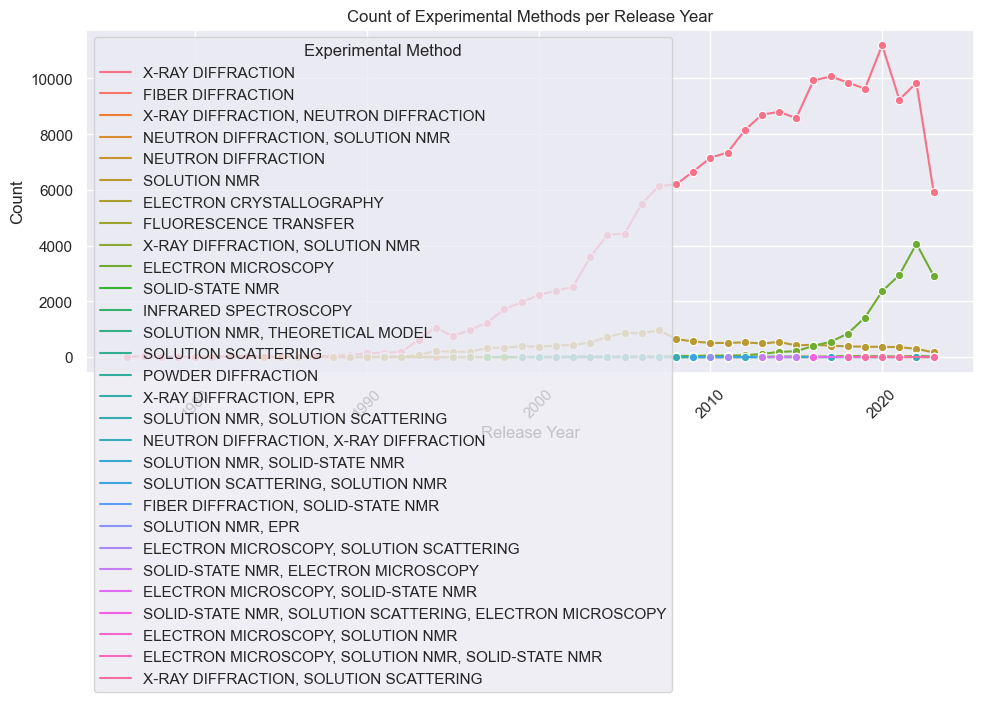

In [12]:
#Create a line plot for the experimental methods with year.
plt.figure(figsize=(10, 6))
sns.lineplot(data=method_counts, x="Release Year", y="Count", hue="Experimental Method", marker="o")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Count of Experimental Methods per Release Year")
plt.xticks(rotation=45)
plt.legend(title="Experimental Method")

plt.tight_layout()
plt.show()

Only 3 methods show much variation.

From earlier the top 3 Experimental methods are; 

X-RAY DIFFRACTION                                            177588, 
ELECTRON MICROSCOPY                                           16426, 
SOLUTION NMR                                                  13913

Lets plot the top 3 methods in terms of number of releases for each year.


In [13]:
# Get the top 3 methods for each year using the earlier methods_counts dataframe
top_methods = method_counts.groupby("Release Year").apply(lambda x: x.nlargest(3, "Count")).reset_index(drop=True)


In [14]:
top_methods.head()

,Release Year,Experimental Method,Count
0,1976.0,X-RAY DIFFRACTION,13
1,1977.0,X-RAY DIFFRACTION,23
2,1978.0,X-RAY DIFFRACTION,6
3,1979.0,X-RAY DIFFRACTION,11
4,1980.0,FIBER DIFFRACTION,9


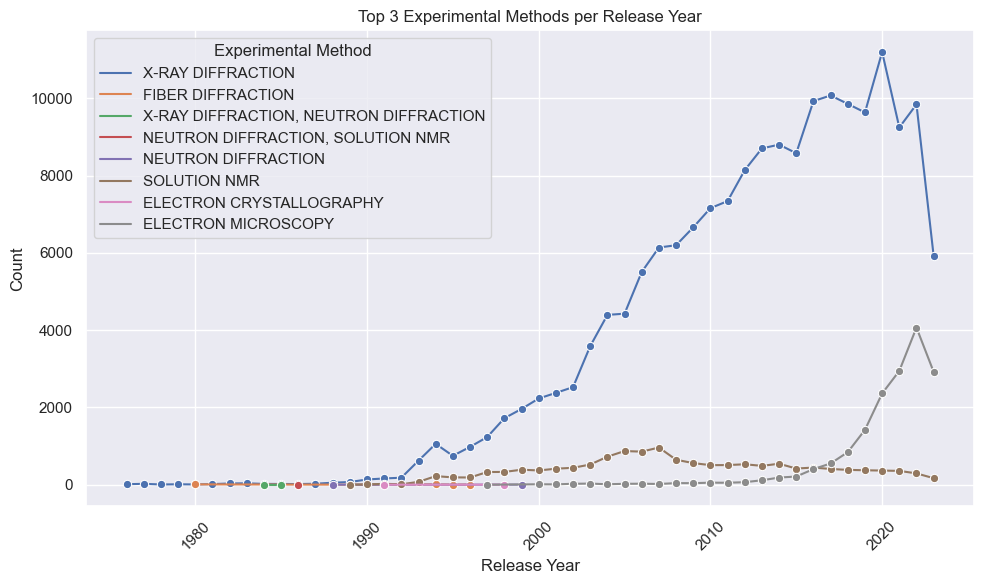

In [15]:
#redo the plot with the new top_methods dataframe
# Create a single combined line plot for the top 4 methods
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_methods, x="Release Year", y="Count", hue="Experimental Method", marker="o")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Top 3 Experimental Methods per Release Year")
plt.xticks(rotation=45)
plt.legend(title="Experimental Method")

plt.tight_layout()
plt.show()

That is much clearer. For tidieness remove the data for 2023 owing to it being incomplete

In [16]:
# Exclude data for the year 2023
top_methods_no2023 = top_methods[top_methods["Release Year"] != 2023]


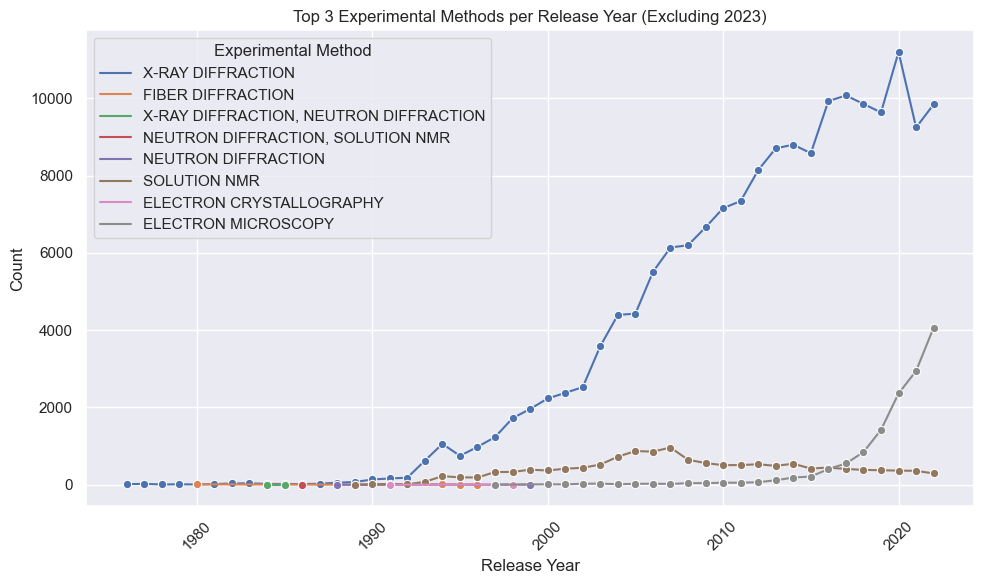

In [17]:
# Create a single combined line plot for the top 4 methods
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_methods_no2023, x="Release Year", y="Count", hue="Experimental Method", marker="o")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Top 3 Experimental Methods per Release Year (Excluding 2023)")
plt.xticks(rotation=45)
plt.legend(title="Experimental Method")

plt.tight_layout()
plt.show()

Much clearer.
Conclusion the major methods for solving macormolecular structures has changed with time. 
X-ray diffraction has shown a steady increase since the 1990s but since about 2015 appears to be levelling off.
Solution NMR had a steady increase in the 1990s and early 2000s after which it has shown a slow decline.
Since about 2015 has shown a rapid increase in structures and is still growing.

Can you explain the spike in structures from X-ray diffraction in 2020? 

# What else could you find out using this data?

Some things to consider

Do the major methods of structure solution vary in terms of structures solved?

Given improvements to technology how has the structures solved or data quality changed?

What factors affect the number of, or presence of structural features, such as waters?

Do larger structures have poorer quality?


# Protein dataset part 2
The second dataset contains data obtained from the pdbsum database (http://www.ebi.ac.uk/thornton-srv/databases/pdbsum/)
This database contains all the structures within the protein data bank but with addition analysis on each structure. This includes information for protein-protein interactions, protein-ligand interactions and in this case data for structures containing ions.

The data supplied contains data obtained for each structure containing an ion and is a summary of the interactions each ion makes. An example for the source data can be found here http://www.ebi.ac.uk/thornton-srv/databases/cgi-bin/pdbsum/GetLigInt.pl?pdb=3f5m&ligtype=01&ligno=01&metal=TRUE for the structure https://www.rcsb.org/structure/3F5M. 

It was extracted using the script Metals_working_keep.ipynb

The data was then combined into a single .csv file

# Read in the second dataset.

In [18]:
# Read the CSV file into a DataFrame
file_path = './combined_metals_keep_data.csv'  # Replace with the actual path to your CSV file
ions_df = pd.read_csv(file_path)


In [19]:
# What types of data do we have
ions_df.dtypes

PDB code                          object
Metal                             object
Chains                            object
Number of hydrogen bonds         float64
Number of non-bonded contacts    float64
Average Distance HB              float64
Std Distance HB                  float64
Max Distance HB                  float64
Min Distance HB                  float64
Average Distance NB              float64
Std Distance NB                  float64
Max Distance NB                  float64
Min Distance NB                  float64
Unique ALA count                   int64
Unique ARG count                   int64
Unique ASN count                   int64
Unique ASP count                   int64
Unique CYS count                   int64
Unique GLU count                   int64
Unique GLN count                   int64
Unique GLY count                   int64
Unique HIS count                   int64
Unique ILE count                   int64
Unique LEU count                   int64
Unique LYS count

# What do these things mean?
See supplementary Glossary of terms found in the proteins data set file.

In [20]:
ions_df

,PDB code,Metal,Chains,Number of hydrogen bonds,Number of non-bonded contacts,Average Distance HB,Std Distance HB,Max Distance HB,Min Distance HB,Average Distance NB,Std Distance NB,Max Distance NB,Min Distance NB,Unique ALA count,Unique ARG count,Unique ASN count,Unique ASP count,Unique CYS count,Unique GLU count,Unique GLN count,Unique GLY count,Unique HIS count,Unique ILE count,Unique LEU count,Unique LYS count,Unique MET count,Unique PHE count,Unique PRO count,Unique SER count,Unique THR count,Unique TRP count,Unique TYR count,Unique VAL count
0,1a2q,CA,A,NaN,16.0,NaN,NaN,NaN,NaN,2.99,0.62,3.87,2.29,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,5jkn,HG,A,1.0,3.0,2.55,0.00,2.55,2.55,3.41,0.61,3.87,2.55,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,6b3f,CL,A,2.0,6.0,3.28,0.02,3.30,3.25,3.62,0.25,3.84,3.25,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,4p0p,MG,A,NaN,6.0,NaN,NaN,NaN,NaN,2.83,0.58,3.51,2.20,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5jbe,CA,A,NaN,12.0,NaN,NaN,NaN,NaN,2.93,0.54,3.69,2.27,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94838,5fzd,MN,A,3.0,9.0,2.17,0.04,2.22,2.11,2.85,0.50,3.46,2.11,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0
94839,5fzd,CL,A,NaN,8.0,NaN,NaN,NaN,NaN,3.21,0.50,3.89,2.57,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,1
94840,6p4d,CL,A,NaN,6.0,NaN,NaN,NaN,NaN,3.45,0.27,3.86,3.04,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
94841,6p4d,NaN,A,NaN,11.0,NaN,NaN,NaN,NaN,3.15,0.57,3.84,2.18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0


94843 different entries with 33 columns. You can see from PDB code 6p4d some structures contain more than one entry (more than one ion). You can also see that 6p4d contains NaN, why do you think this might be. How do you deal with it?

You can compare the original data for 3f5m  http://www.ebi.ac.uk/thornton-srv/databases/cgi-bin/pdbsum/GetLigInt.pl?pdb=3f5m&ligtype=01&ligno=01&metal=TRUE with the extracted data.

In [21]:
# Assuming df is your DataFrame
row_3f5m = ions_df[ions_df['PDB code'] == '3f5m']

row_3f5m

,PDB code,Metal,Chains,Number of hydrogen bonds,Number of non-bonded contacts,Average Distance HB,Std Distance HB,Max Distance HB,Min Distance HB,Average Distance NB,Std Distance NB,Max Distance NB,Min Distance NB,Unique ALA count,Unique ARG count,Unique ASN count,Unique ASP count,Unique CYS count,Unique GLU count,Unique GLN count,Unique GLY count,Unique HIS count,Unique ILE count,Unique LEU count,Unique LYS count,Unique MET count,Unique PHE count,Unique PRO count,Unique SER count,Unique THR count,Unique TRP count,Unique TYR count,Unique VAL count
24957,3f5m,NaN,D_A,NaN,12.0,NaN,NaN,NaN,NaN,3.39,0.36,3.83,2.64,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
24958,3f5m,MG,D,NaN,3.0,NaN,NaN,NaN,NaN,3.27,0.31,3.55,2.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This structure contains 2 ions the second contains MG. If you wish to compare to the original data it can be found here http://www.ebi.ac.uk/thornton-srv/databases/cgi-bin/pdbsum/GetLigInt.pl?pdb=3f5m&ligtype=02&ligno=01&metal=TRUE

# What could you consider using this data?
Some things you could consider

Is the presence of ions is dependant on the resolution of the data.

Do the standard deviations in the second data set vary with resolution

Do the length of ion-protein interaction vary with the size of the ion.

Is there variation in the amino acid environments around different ions.

Cations are positively charged, they will interact with negatively chared amino acids.

Anions are negatively charged, they will interact with positively charged amino acids.
